In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('./data/student_depression_dataset.csv')

In [3]:
data.dropna(inplace=True)
data.columns = data.columns.str.replace(' ', '', regex=False)
data.columns = data.columns.str.replace('Satisfaction', 'Sat', regex=False)
data.drop('Profession', axis=1, inplace=True)
data.drop('JobSat', axis=1, inplace=True)
data.drop('WorkPressure', axis=1, inplace=True)
data = data.rename(columns = {'Haveyoueverhadsuicidalthoughts?': 'SuicidalThoughts'})
print(data.head())

# preparing data

   id  Gender   Age           City  AcademicPressure  CGPA  StudySat  \
0   2    Male  33.0  Visakhapatnam               5.0  8.97       2.0   
1   8  Female  24.0      Bangalore               2.0  5.90       5.0   
2  26    Male  31.0       Srinagar               3.0  7.03       5.0   
3  30  Female  28.0       Varanasi               3.0  5.59       2.0   
4  32  Female  25.0         Jaipur               4.0  8.13       3.0   

         SleepDuration DietaryHabits   Degree SuicidalThoughts  \
0          '5-6 hours'       Healthy  B.Pharm              Yes   
1          '5-6 hours'      Moderate      BSc               No   
2  'Less than 5 hours'       Healthy       BA               No   
3          '7-8 hours'      Moderate      BCA              Yes   
4          '5-6 hours'      Moderate   M.Tech              Yes   

   Work/StudyHours FinancialStress FamilyHistoryofMentalIllness  Depression  
0              3.0             1.0                           No           1  
1             

In [4]:
print(f"The best student's id is: {data['CGPA'].idxmax()} with the mark of {data['CGPA'].max()}")
print(f"The worst student's id is: {data['CGPA'].idxmin()} with the mark of {data['CGPA'].min()}")
print(f"The oldest student's age is: {data['Age'].max()}")
print(f"The youngest student's age is: {data['Age'].min()}")

The best student's id is: 417 with the mark of 10.0
The worst student's id is: 4365 with the mark of 0.0
The oldest student's age is: 59.0
The youngest student's age is: 18.0


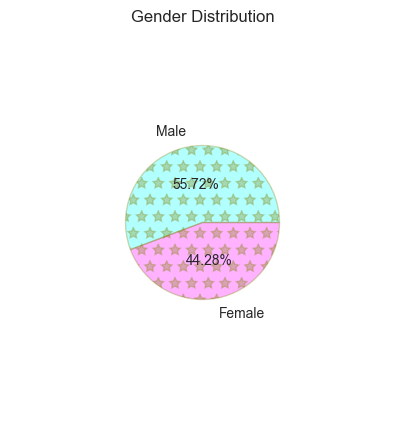

In [5]:
# Gender pie chart

plt.figure(figsize = (5,5))
plt.pie(data['Gender'].value_counts(), labels = ['Male', 'Female'], colors = ['cyan', 'fuchsia'], autopct = '%1.2f%%', pctdistance = 0.5, radius = 0.5, labeldistance = 1.2, wedgeprops={'ec': 'olive', 'hatch': '*', 'alpha': 0.3})
plt.title('Gender Distribution')
plt.show()

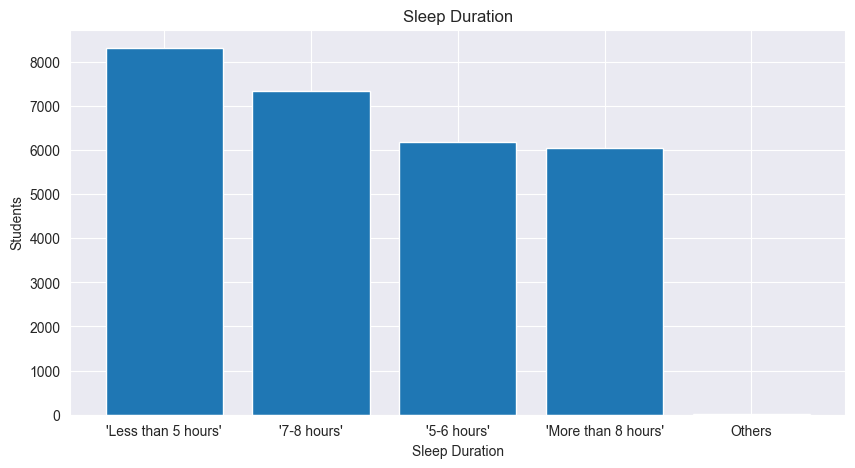

In [6]:
# Sleeping hours bar chart

sleep_counts = data['SleepDuration'].value_counts()

plt.figure(figsize = (10,5))
plt.bar(sleep_counts.index, sleep_counts.values)
plt.xlabel('Sleep Duration')
plt.ylabel('Students')
plt.title('Sleep Duration')
plt.show()

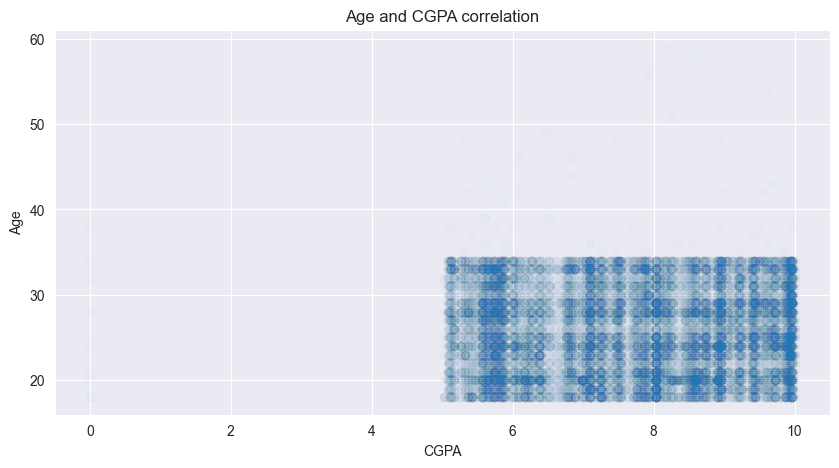

In [7]:
# Correlation between CGPA and SleepDuration

plt.figure(figsize = (10,5))
plt.scatter(data['CGPA'], data['Age'], alpha = 0.01)
plt.xlabel('CGPA')
plt.ylabel('Age')
plt.title('Age and CGPA correlation')
plt.show()

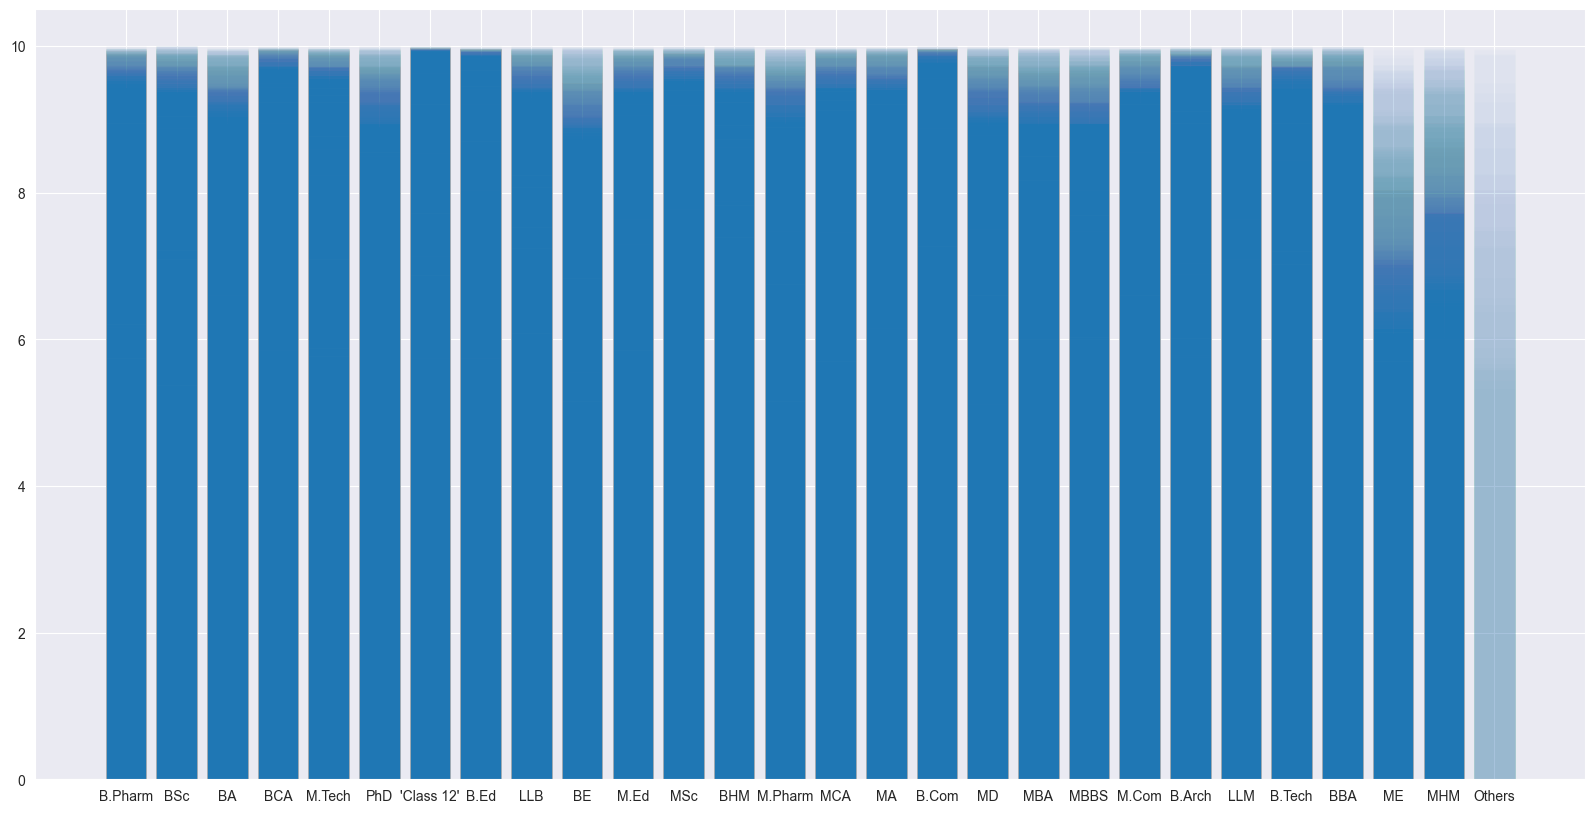

In [8]:
# Correlation between Degree and CGPA

plt.figure(figsize = (20,10))
plt.bar(data['Degree'], data['CGPA'], alpha = 0.01)
plt.show()

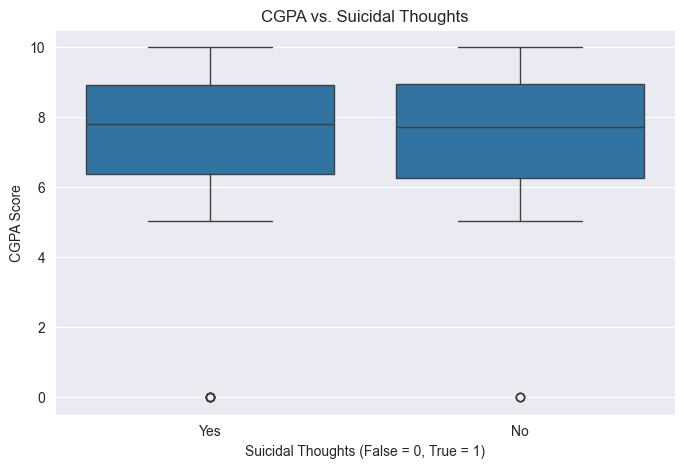

In [11]:
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x='SuicidalThoughts', y='CGPA', data=data)

plt.xlabel('Suicidal Thoughts (False = 0, True = 1)')
plt.ylabel('CGPA Score')
plt.title('CGPA vs. Suicidal Thoughts')
plt.show()

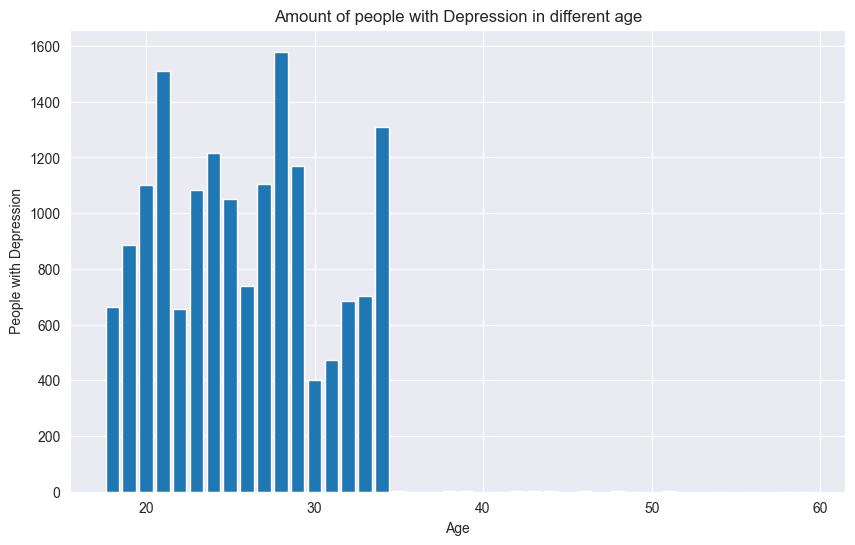

In [19]:
plt.figure(figsize = (10, 6))
plt.bar(data['Age'].value_counts().index, data.groupby('Age')['Depression'].sum())
plt.xlabel('Age')
plt.ylabel('People with Depression')
plt.title('Amount of people with Depression in different age')
plt.show()

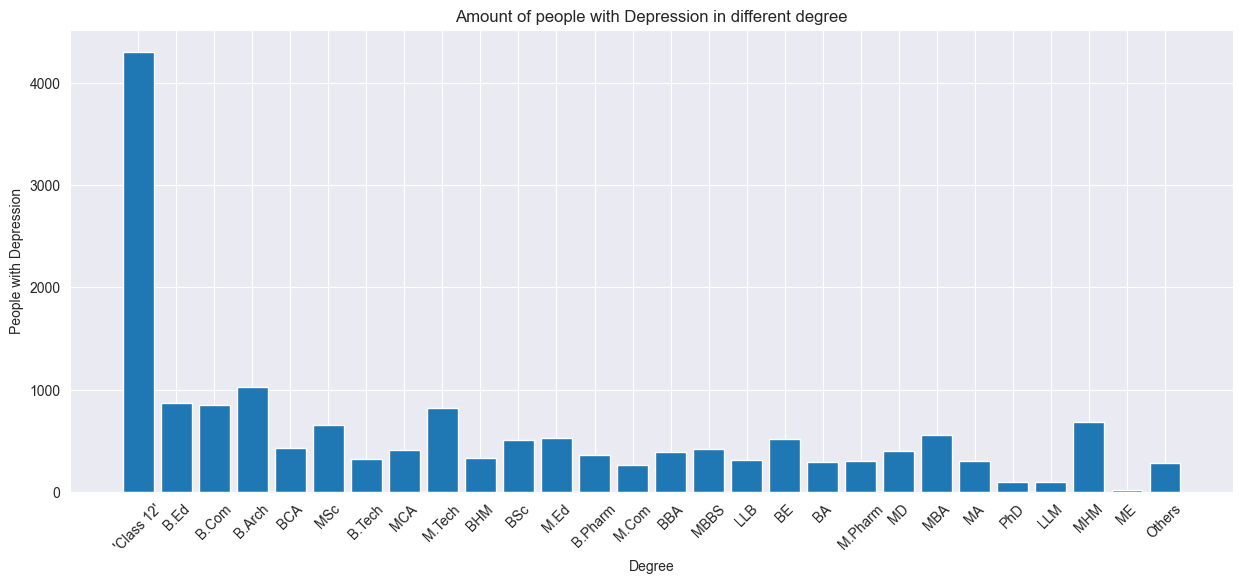

In [23]:
plt.figure(figsize = (15, 6))
plt.bar(data['Degree'].value_counts().index, data.groupby('Degree')['Depression'].sum())
plt.xlabel('Degree')
plt.ylabel('People with Depression')
plt.title('Amount of people with Depression in different degree')
plt.xticks(rotation = 45)
plt.show()